Initial thetas 0.0 0.0 0.0
Initial cost: 3297.1542295918366
Alpha/learning rate: 0.05
Epochs: 500
Final thetas: 80.98035710897136 -0.5881162483895243 2.861286588139634
Final cost: 13.497270805929185


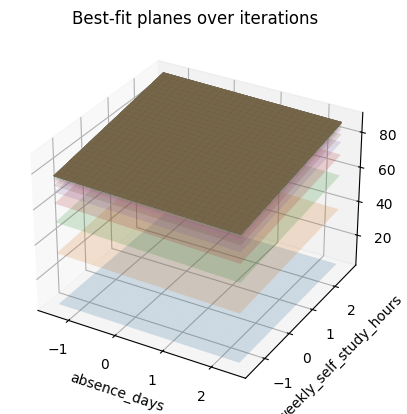

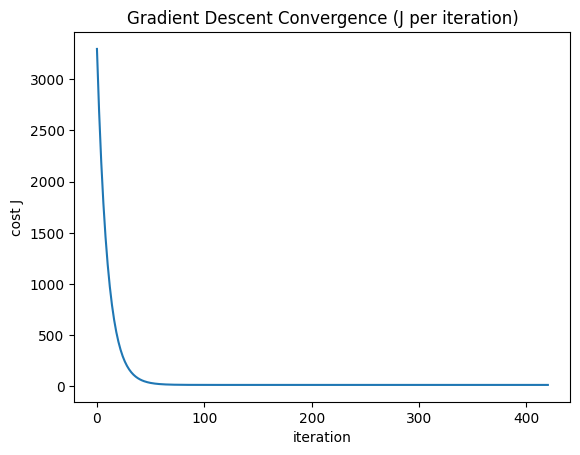

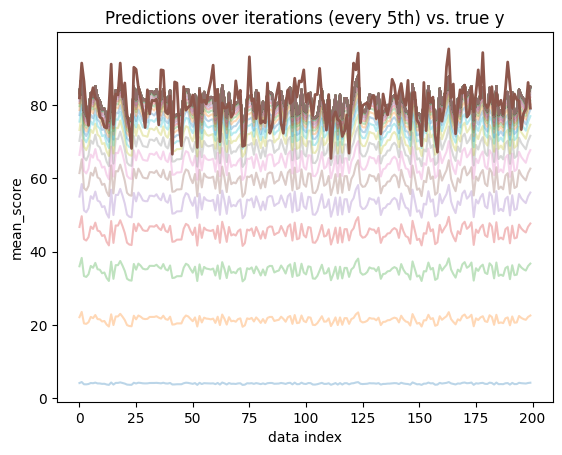

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv("student-scores.csv")
df = pd.DataFrame(data)

cols = ['math_score','chemistry_score','physics_score','history_score',
        'geography_score','biology_score','english_score']
df['mean_score'] = df[cols].mean(axis=1)

x1 = df['absence_days'].astype(float).values
x2 = df['weekly_self_study_hours'].astype(float).values
y = df['mean_score'].astype(float).values

# # Build features and target
# X_raw = df[['absence_days','weekly_self_study_hours']].astype(float).values
# y = df['mean_score'].values.astype(float)
# m = len(y)


mu = X_raw.mean(axis=0)
sigma = X_raw.std(axis=0, ddof=0) + 1e-8
Xz = (X_raw - mu) / sigma
x1 = Xz[:,0]
x2 = Xz[:,1]


theta0 = 0.0
theta1 = 0.0
theta2 = 0.0

err = (theta0 + theta1*x1 + theta2*x2) - y
J = np.dot(err, err) / (2*m)

alpha = 0.05






print("Initial thetas", theta0,theta1, theta2)
print("Initial cost:", J)
print("Alpha/learning rate:", alpha)
print("Epochs:", 500)

x1_raw = x1
x2_raw = x2

g1 = np.linspace(x1_raw.min(), x1_raw.max(), 30)
g2 = np.linspace(x2_raw.min(), x2_raw.max(), 30)
G1, G2 = np.meshgrid(g1, g2)

G1z = (G1 - mu[0])/sigma[0]
G2z = (G2 - mu[1])/sigma[1]
Y_plane = theta0 + theta1 * G1z + theta2 * G2z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# # data points
# ax.scatter(x1_raw, x2_raw, y, s=8, label='true y')

# # regression plane
# ax.plot_surface(G1, G2, Y_plane, alpha=0.35, linewidth=0, antialiased=True)


theta_history, J_history = [], []

for i in range(500):
    y_hat = theta0 + theta1*x1 + theta2*x2
    errors = y_hat - y

    # gradients (means == sums/m)
    g0 = errors.mean()
    g1 = (errors * x1).mean()
    g2 = (errors * x2).mean()

    # candidate step
    new_t0 = theta0 - alpha*g0
    new_t1 = theta1 - alpha*g1
    new_t2 = theta2 - alpha*g2

    err = (theta0 + theta1*x1 + theta2*x2) - y
    new_J = np.dot(err, err) / (2*m)

    # simple safeguard: if J got worse, shrink α and skip accepting
    if new_J > J:
        alpha *= 0.5
        continue

    # accept step
    theta0, theta1, theta2 = new_t0, new_t1, new_t2
    J = new_J

    theta_history.append((theta0,theta1,theta2))
    J_history.append(J)





print("Final thetas:", theta0, theta1, theta2)
print("Final cost:", J)




selected = list(range(0, len(theta_history), 10)) + [len(theta_history)-1]
for k in selected:
    t0, t1, t2 = theta_history[k]
    # if standardized, use G1z/G2z like above; else use G1/G2 directly
    Yk = t0 + t1 * G1 + t2 * G2
    ax.plot_surface(G1, G2, Yk, alpha=0.18, linewidth=0, antialiased=True)

ax.set_xlabel('absence_days')
ax.set_ylabel('weekly_self_study_hours')
ax.set_zlabel('mean_score')
plt.title('Best-fit planes over iterations')
plt.show()


plt.figure()
plt.plot(np.arange(len(J_history)), J_history)
plt.xlabel("iteration")
plt.ylabel("cost J")
plt.title("Gradient Descent Convergence (J per iteration)")
plt.show()

idx = np.arange(len(y))                 # data index on x-axis
subset = idx[:200]                      # plot first 200 points for readability

plt.figure()
for k, (t0, t1, t2) in enumerate(theta_history[::5]):  # every 5th iteration
    y_hat_k = t0 + t1*x1 + t2*x2
    plt.plot(subset, y_hat_k[subset], alpha=0.3)       # many light lines

plt.plot(subset, y[subset], linewidth=2)               # true y on top
plt.xlabel("data index")
plt.ylabel("mean_score")
plt.title("Predictions over iterations (every 5th) vs. true y")
plt.show()


